# Notebook Imports and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm   # color map

from sympy import symbols, diff     # diff is used for partial derivatives
from math import *

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

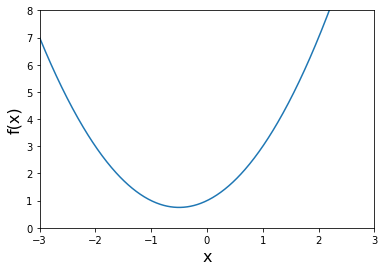

In [4]:
# Plot
plt.xlim(-3,3)
plt.ylim(0,8)
plt.plot(x_1, f(x_1))
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.show()

## Slope & Derivatives

Challenge: Create a python function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2*x + 1

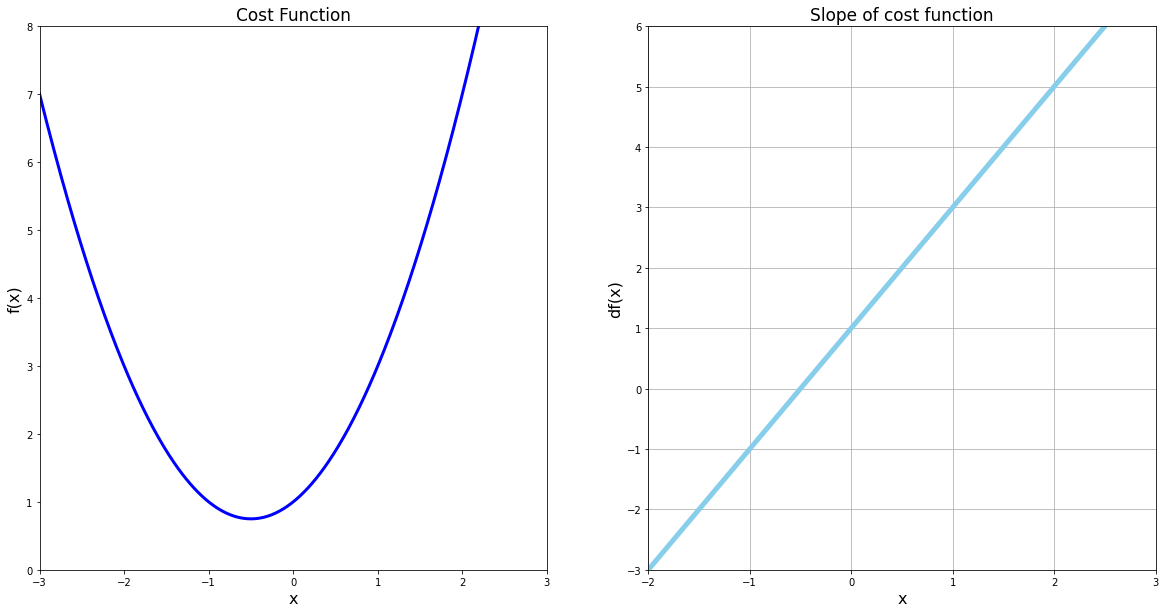

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[20, 10]) #Measurement in inches

# 1 Chart: Cost function
plt.subplot(1, 2, 1) #Usage subplot(no. of rows, no. of columns, plot number)

plt.title("Cost Function", fontsize=17)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.title("Slope of cost function", fontsize=17)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.show()

## Challenge to stack the graphs up and down

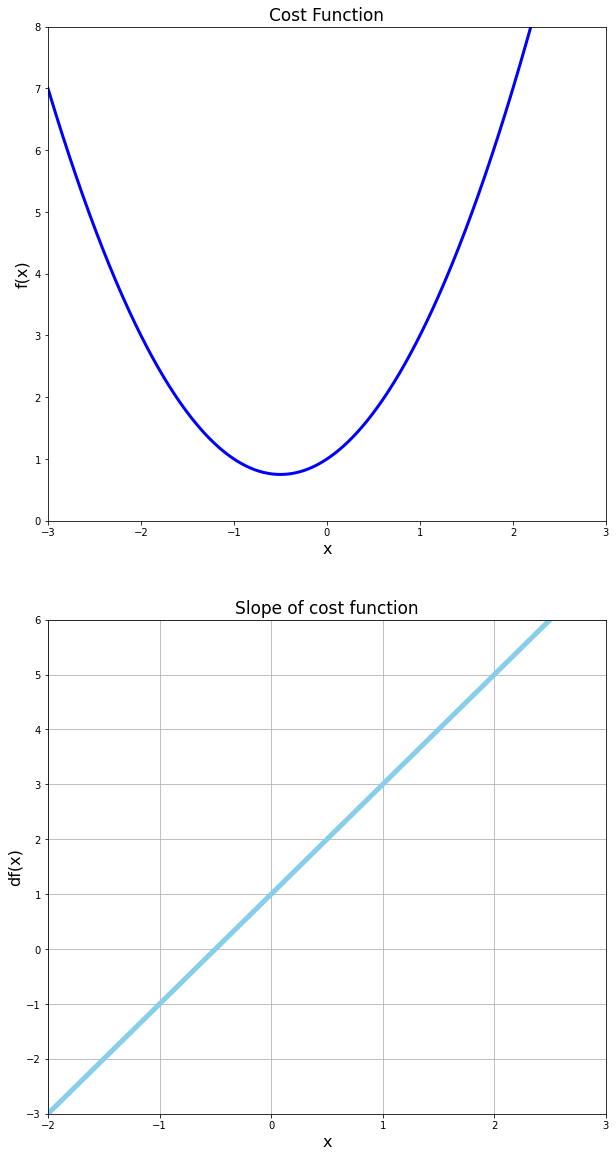

In [7]:
# Plot function and derivative side by side
plt.figure(figsize=[10, 20]) #Measurement in inches

# 1 Chart: Cost function
plt.subplot(2, 1, 1) #Usage subplot(no. of rows, no. of columns, plot number)

plt.title("Cost Function", fontsize=17)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

# 2 Chart: Derivative
plt.subplot(2, 1, 2)
plt.title("Slope of cost function", fontsize=17)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)
plt.xlim(-2,3)
plt.ylim(-3,6)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.show()

## Python Loops & Gradient Descent

In [8]:
# Python for loop
for n in range(5):
    print("Hello World", n)
print("End of loop")

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of loop


In [9]:
# Python while loop
counter = 0
while counter < 7:
    print("Counting ...", counter)
    counter = counter + 1
print("Ready or not, here I come!")

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Ready or not, here I come!


In [10]:
# Gradient Descent
new_x = -3
previous_x = 0
step_multiplier = 0.1     # Learning Rate

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

print("Local minimum occurs at:", new_x)
print("Slope or df(x) value at this point is:", df(new_x))
print("f(x) value or cost at this point is:", f(new_x))

Local minimum occurs at: -0.5000000000000002
Slope or df(x) value at this point is: -4.440892098500626e-16
f(x) value or cost at this point is: 0.75


In [11]:
# Achieving the same thing and considering precision and mmaking visualizations
new_x = -3
previous_x = 0
step_multiplier = 0.1     # Learning Rate
precision = 0.00001

x_list = [new_x]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    if step_size < precision:
        print("Loop ran this many times:", n)
        break
    x_list.append(new_x)
        
print("Local minimum occurs at:", new_x)
print("Slope or df(x) value at this point is:", df(new_x))
print("f(x) value or cost at this point is:", f(new_x))

Loop ran this many times: 49
Local minimum occurs at: -0.5000356811923176
Slope or df(x) value at this point is: -7.136238463512079e-05
f(x) value or cost at this point is: 0.7500000012731475


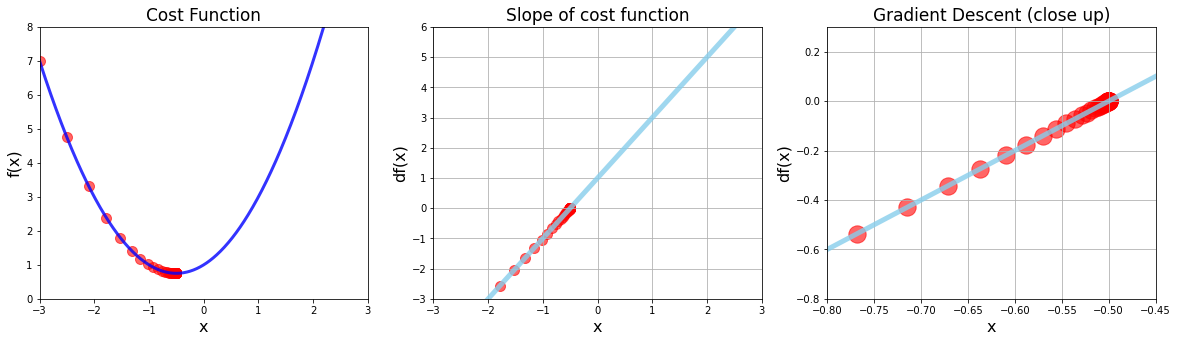

In [12]:
# Superimpose the gradient descent calculations on plot
plt.figure(figsize=[20, 5]) #Measurement in inches

# 1 Chart: Cost function
plt.subplot(1, 3, 1) #Usage subplot(no. of rows, no. of columns, plot number)

plt.title("Cost Function", fontsize=17)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)
plt.title("Slope of cost function", fontsize=17)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)
plt.xlim(-3,3)
plt.ylim(-3,6)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.scatter(x_list, df(values), color='red', s=100, alpha=0.6)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)
plt.title("Gradient Descent (close up)", fontsize=17)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)
plt.xlim(-0.8, -0.45)
plt.ylim(-0.8, 0.3)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.scatter(x_list, df(values), color='red', s=300, alpha=0.6)


plt.show()

# Converging from the other side

In [13]:
# Achieving the same thing and considering precision and mmaking visualizations
new_x = 3
previous_x = 0
step_multiplier = 0.1     # Learning Rate
precision = 0.00001

x_list = [new_x]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    if step_size < precision:
        print("Loop ran this many times:", n)
        break
    x_list.append(new_x)
        
print("Local minimum occurs at:", new_x)
print("Slope or df(x) value at this point is:", df(new_x))
print("f(x) value or cost at this point is:", f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


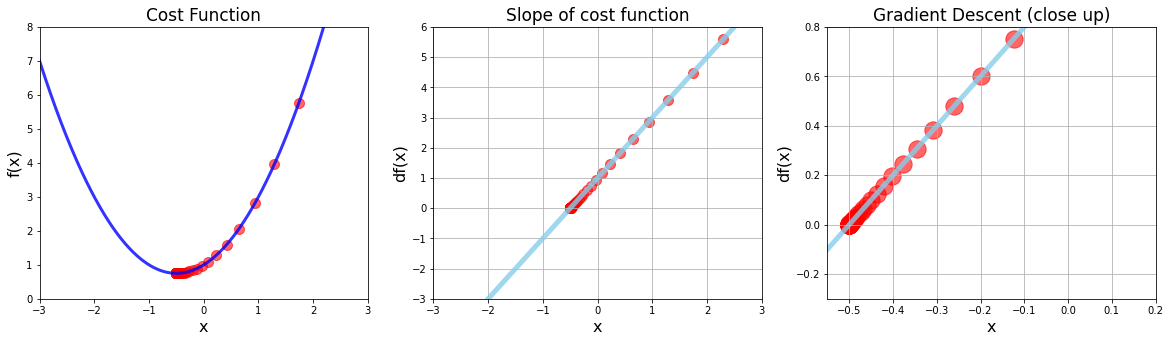

In [14]:
# Superimpose the gradient descent calculations on plot
plt.figure(figsize=[20, 5]) #Measurement in inches

# 1 Chart: Cost function
plt.subplot(1, 3, 1) #Usage subplot(no. of rows, no. of columns, plot number)

plt.title("Cost Function", fontsize=17)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)
plt.title("Slope of cost function", fontsize=17)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)
plt.xlim(-3,3)
plt.ylim(-3,6)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.scatter(x_list, df(values), color='red', s=100, alpha=0.6)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)
plt.title("Gradient Descent (close up)", fontsize=17)
plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)
plt.xlim(-0.55, 0.2)
plt.ylim(-0.3, 0.8)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.scatter(x_list, df(values), color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [15]:
# Make some data
x_2 = np.linspace(start = -2, stop = 2, num = 1000)
def g(x):
    return x**4 - 4*(x**2) + 5
def dg(x):
    return 4*(x**3) -8*x

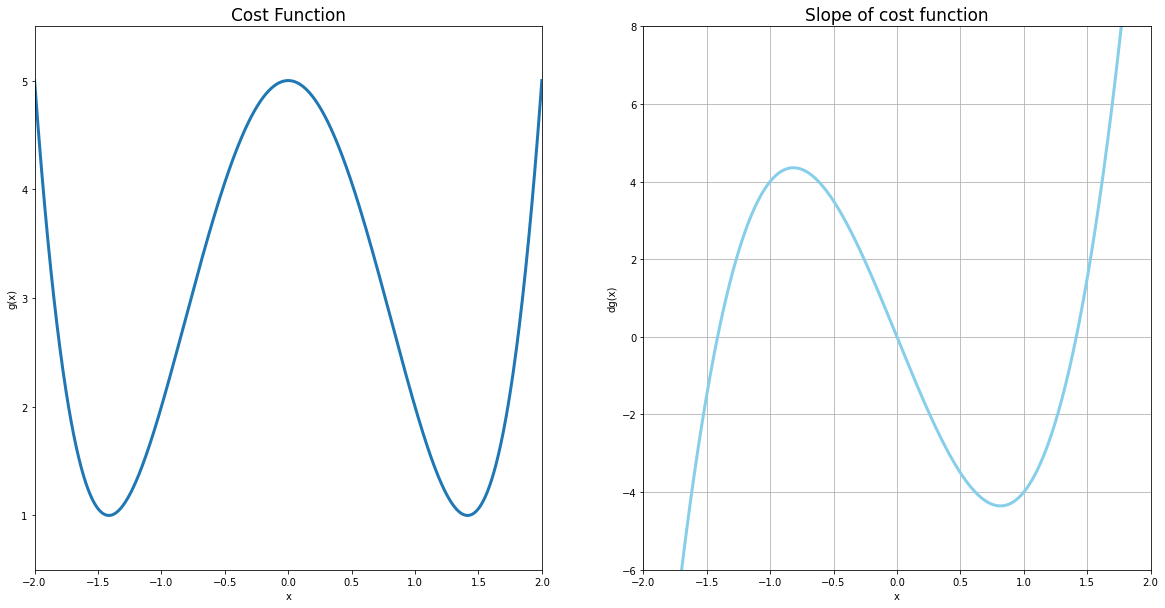

In [16]:
plt.figure(figsize = [20, 10])
# 1 Chart : Cost Function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), linewidth = 3)
plt.title("Cost Function", fontsize=17)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.xlim(-2,2)
plt.ylim(0.5,5.5)

# 2 Chart : Derivative of cost function
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=3)
plt.title("Slope of cost function", fontsize=17)
plt.xlabel("x")
plt.ylabel("dg(x)")
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.grid()

plt.show()

## Gradient Descent as a Python Function

In [17]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, 
                     precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        # print(step_size)
        if step_size < precision:
            break
    return new_x, x_list, slope_list  # Actually returns a tuple

In [18]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [19]:
# Or it can also be done like this
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess= -0.5, 
                                                 multiplier=0.01, 
                                                 precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [20]:
# Using default values
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


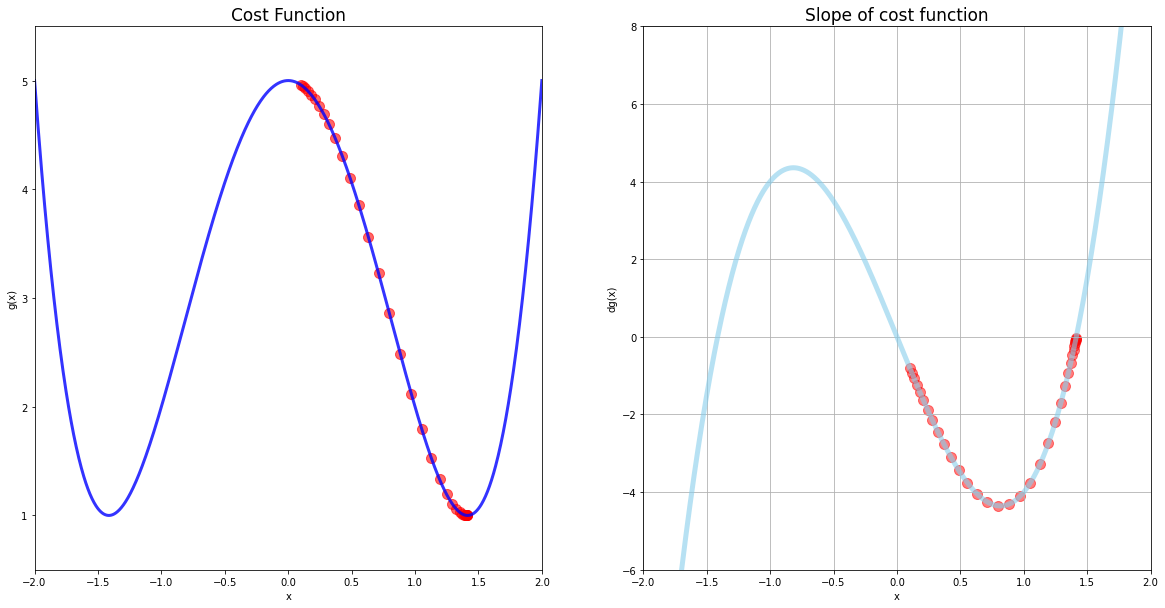

In [21]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess= 0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [20, 10])

# 1 Chart : Cost Function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), linewidth = 3, color='blue', alpha=0.8)
plt.title("Cost Function", fontsize=17)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.scatter(list_x, g(np.array(list_x)), s=100, alpha=0.6, color='red')

# 2 Chart : Derivative of cost function
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.title("Slope of cost function", fontsize=17)
plt.xlabel("x")
plt.ylabel("dg(x)")
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.scatter(list_x, deriv_list, s=100, alpha=0.5, color='red')
plt.grid()

plt.show()

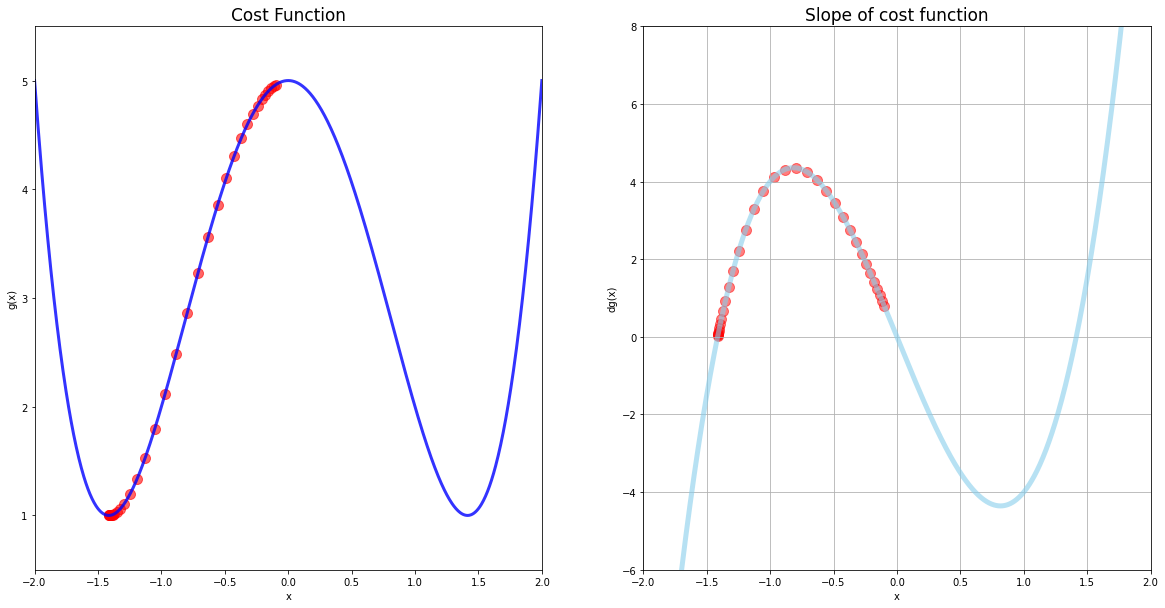

In [22]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess= -0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [20, 10])

# 1 Chart : Cost Function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), linewidth = 3, color='blue', alpha=0.8)
plt.title("Cost Function", fontsize=17)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.scatter(list_x, g(np.array(list_x)), s=100, alpha=0.6, color='red')

# 2 Chart : Derivative of cost function
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.title("Slope of cost function", fontsize=17)
plt.xlabel("x")
plt.ylabel("dg(x)")
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.scatter(list_x, deriv_list, s=100, alpha=0.5, color='red')
plt.grid()

plt.show()

## Glitch in the process

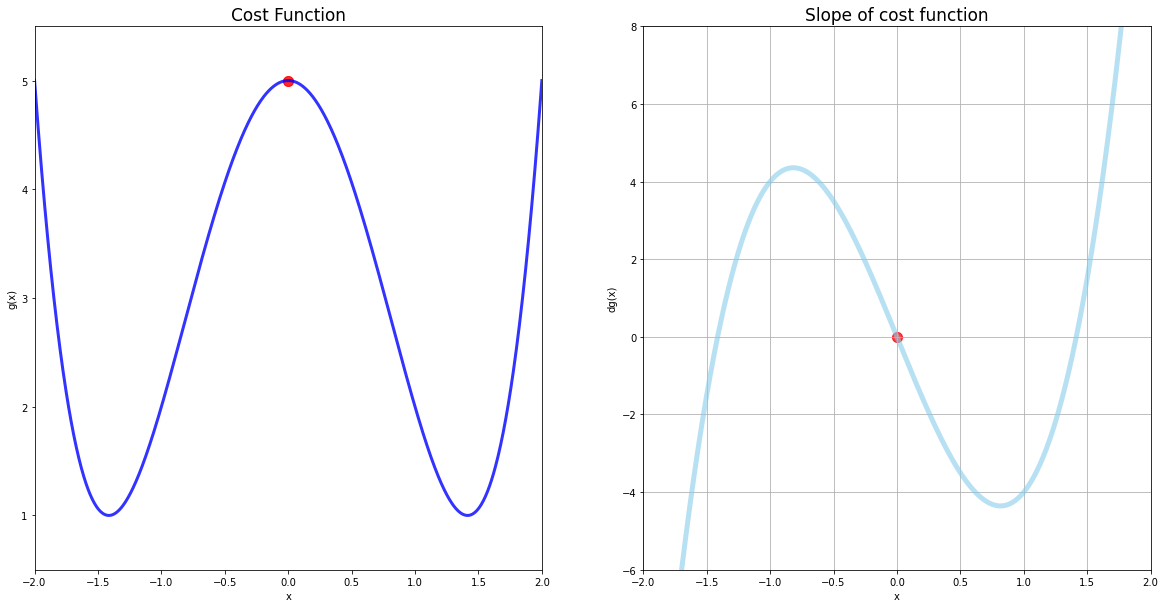

In [23]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [20, 10])

# 1 Chart : Cost Function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), linewidth = 3, color='blue', alpha=0.8)
plt.title("Cost Function", fontsize=17)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.scatter(list_x, g(np.array(list_x)), s=100, alpha=0.6, color='red')

# 2 Chart : Derivative of cost function
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.title("Slope of cost function", fontsize=17)
plt.xlabel("x")
plt.ylabel("dg(x)")
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.scatter(list_x, deriv_list, s=100, alpha=0.5, color='red')
plt.grid()

plt.show()

# Exaple 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [24]:
# Make Data
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)
def h(x):
    return x**5 - 2*x**4 + 2
def dh(x):
    return 5*x**4 - 8*x**3

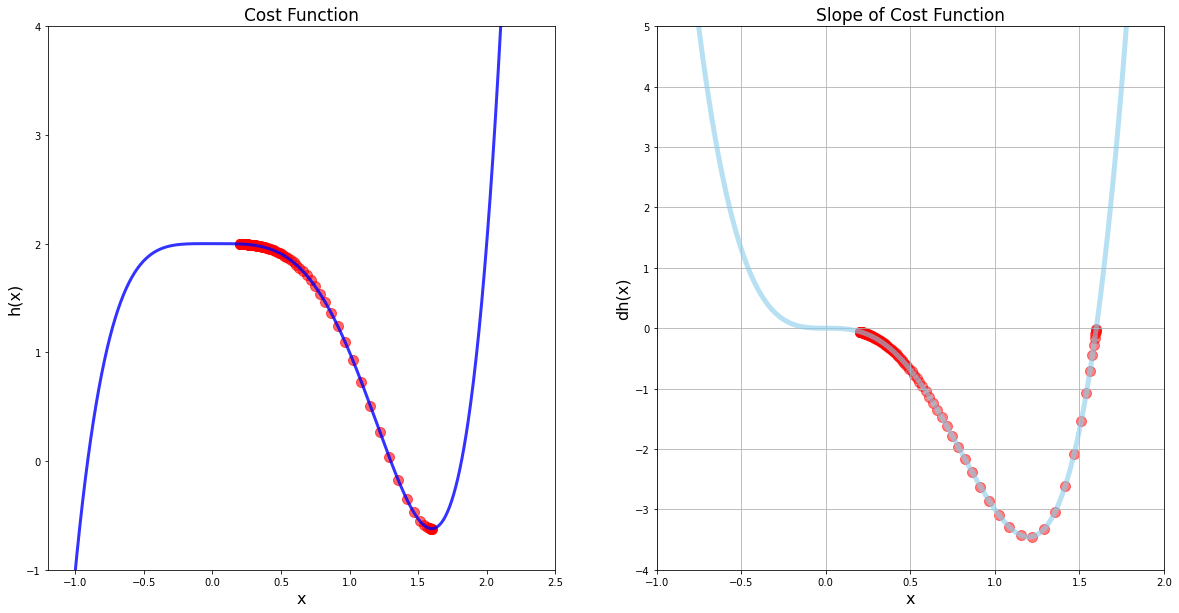

Local min ocuurs at:  1.5989534547394717
Cost at this minimum is:  -0.6214287992331258
Number os steps:  117


In [25]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, 
                                                 initial_guess= 0.2, 
                                                 max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[20, 10])

# 1 Chart : Cost Function
plt.subplot(1, 2, 1)
plt.plot(x_3, h(x_3), linewidth = 3, color = 'blue', alpha = 0.8)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.scatter(list_x, h(np.array(list_x)), s=100, color = 'red', alpha = 0.6)
plt.title('Cost Function', fontsize = 17)

# 2 Chart : Derivative of cost function
plt.subplot(1, 2, 2)
plt.plot(x_3, dh(x_3), color = 'skyblue', linewidth = 5, alpha = 0.6)
plt.title('Slope of Cost Function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.scatter(list_x, deriv_list, s=100, color = 'red', alpha = 0.5)
plt.grid()

plt.show()
print("Local min ocuurs at: ", local_min)
print("Cost at this minimum is: ", h(local_min))
print("Number os steps: ", len(list_x))

In [26]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [27]:
# Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print('I looooove', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor.')

I looooove bacon
My hotel has no 4th floor.


# The Learning Rate

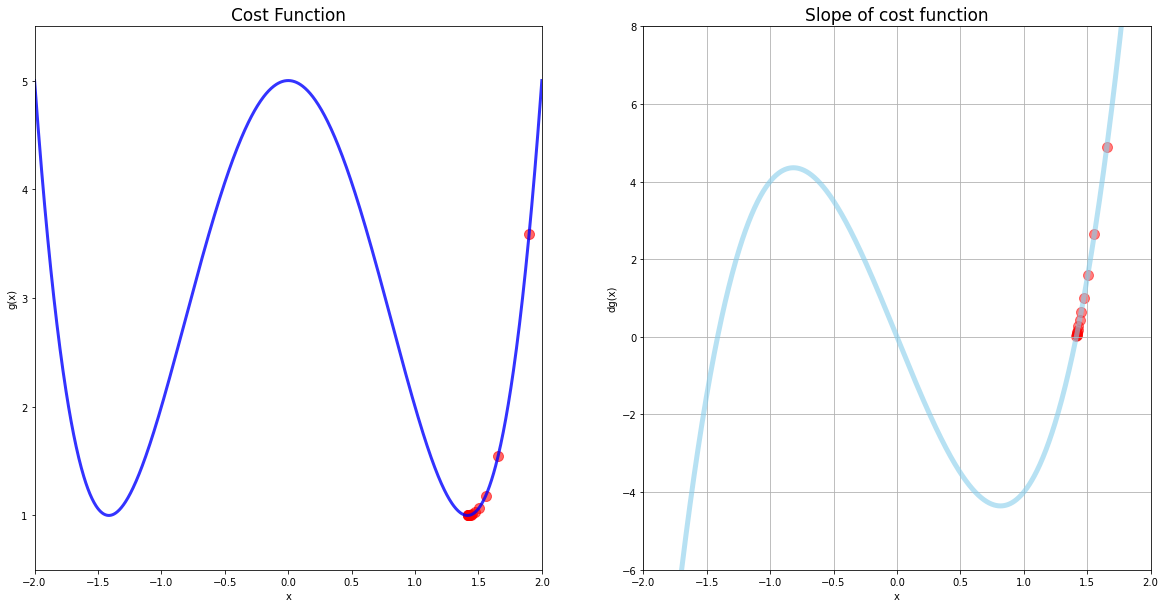

Number of steps is: 14


In [28]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess= 1.9, 
                                                 multiplier=0.02, 
                                                 max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [20, 10])

# 1 Chart : Cost Function
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), linewidth = 3, color='blue', alpha=0.8)
plt.title("Cost Function", fontsize=17)
plt.xlabel("x")
plt.ylabel("g(x)")
plt.xlim(-2,2)
plt.ylim(0.5,5.5)
plt.scatter(list_x, g(np.array(list_x)), s=100, alpha=0.6, color='red')

# 2 Chart : Derivative of cost function
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.title("Slope of cost function", fontsize=17)
plt.xlabel("x")
plt.ylabel("dg(x)")
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.scatter(list_x, deriv_list, s=100, alpha=0.5, color='red')
plt.grid()

plt.show()
print("Number of steps is:", len(list_x))

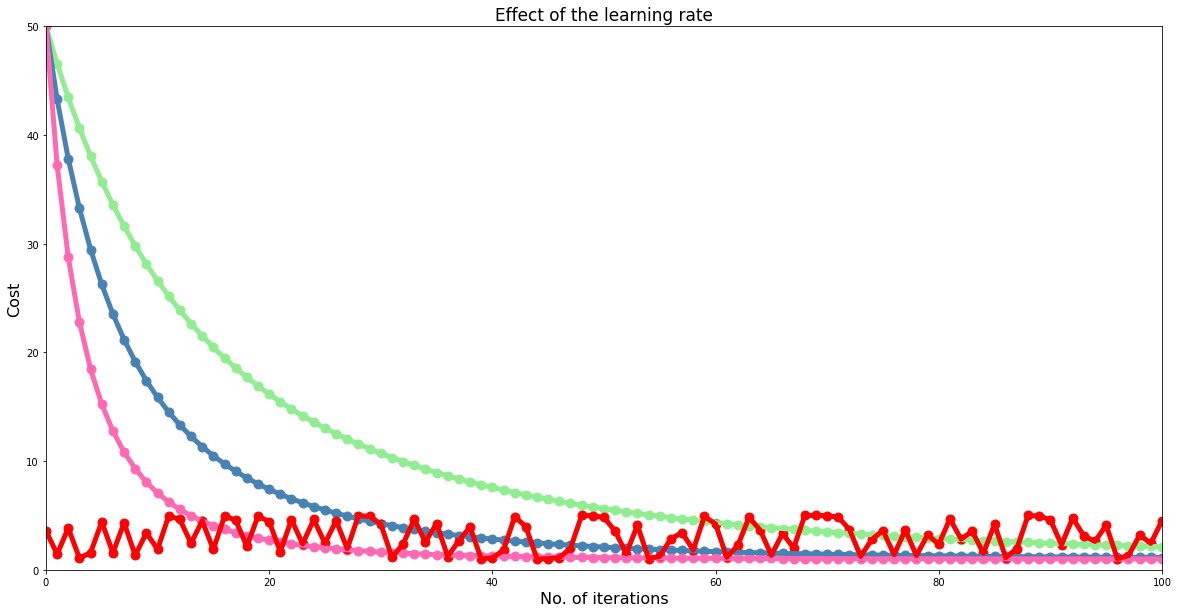

In [29]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, 
                             multiplier=0.0005, 
                             precision =0.0001, 
                             max_iter=n)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, 
                             multiplier=0.001, 
                             precision =0.0001, 
                             max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3, 
                             multiplier=0.002, 
                             precision =0.0001, 
                             max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9, 
                             multiplier=0.25, 
                             precision =0.0001, 
                             max_iter=n)


# Plotting reduction in cost for each iteration

plt.figure(figsize = [20, 10])

# 1 Chart : Cost Function
plt.title("Effect of the learning rate", fontsize=17)
plt.xlabel("No. of iterations", fontsize=16)
plt.ylabel("Cost", fontsize=16)
plt.xlim(0, n)
plt.ylim(0, 50)

# Values for the charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), linewidth = 5, color='lightgreen')
plt.scatter(iteration_list, g(low_values), s=80, color='lightgreen')

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), linewidth=5, color='steelblue')
plt.scatter(iteration_list, g(mid_values), s=80, color='steelblue')

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), linewidth=5, color='hotpink')
plt.scatter(iteration_list, g(high_values), s=80, color='hotpink')

# Plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), linewidth=5, color='red')
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), s=80, color='red')

plt.show()


# Example 4 - Data Viz with 3D Charts

## Minimize $$p(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimize $$p(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2 - y^2}$

In [30]:
def p(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [31]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)

print("Array after meshgrid", x_4.shape)

Shape of X array (200,)
Array after meshgrid (200, 200)


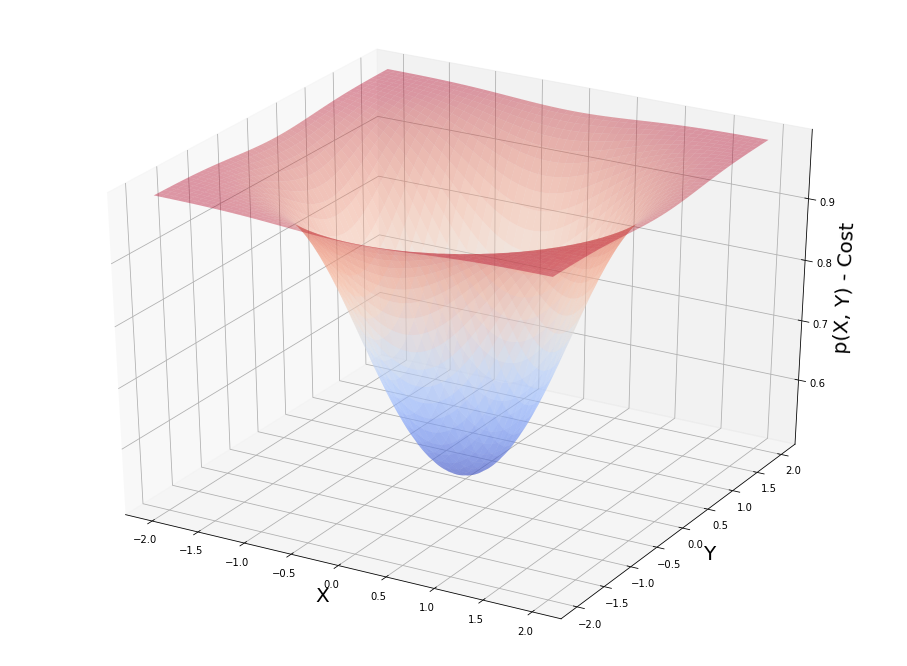

In [32]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')      # gca = Get Current Axis

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('p(X, Y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, p(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)     # x,y,z = 2D Arrays
plt.show()

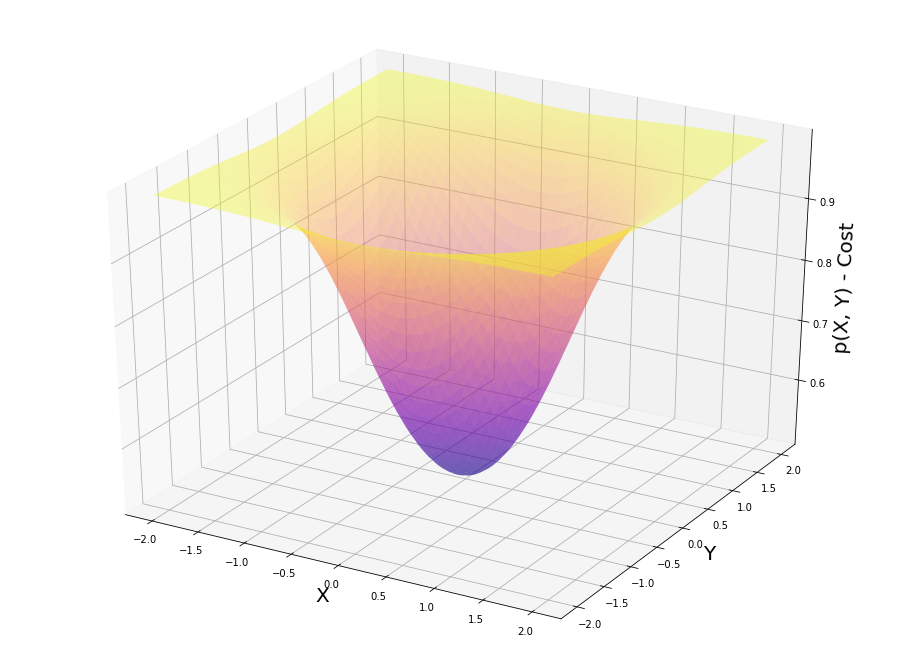

In [33]:
# Other color maps

# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')      # gca = Get Current Axis

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('p(X, Y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, p(x_4, y_4), cmap=cm.plasma, alpha=0.4)    # x,y,z = 2D Arrays
plt.show()

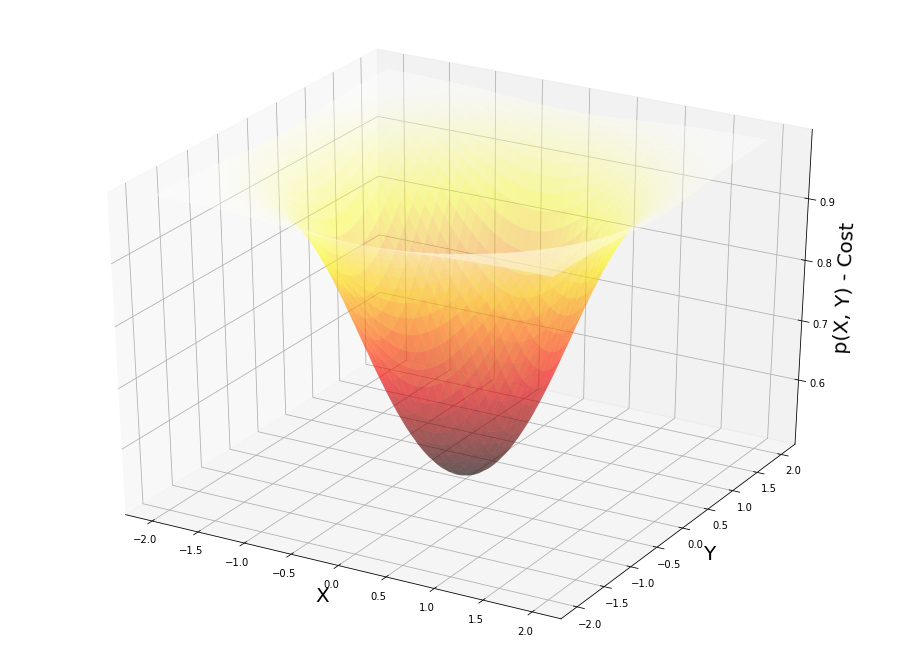

In [34]:
# Other color maps

# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')      # gca = Get Current Axis

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('p(X, Y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, p(x_4, y_4), cmap=cm.hot, alpha=0.4)    # x,y,z = 2D Arrays
plt.show()

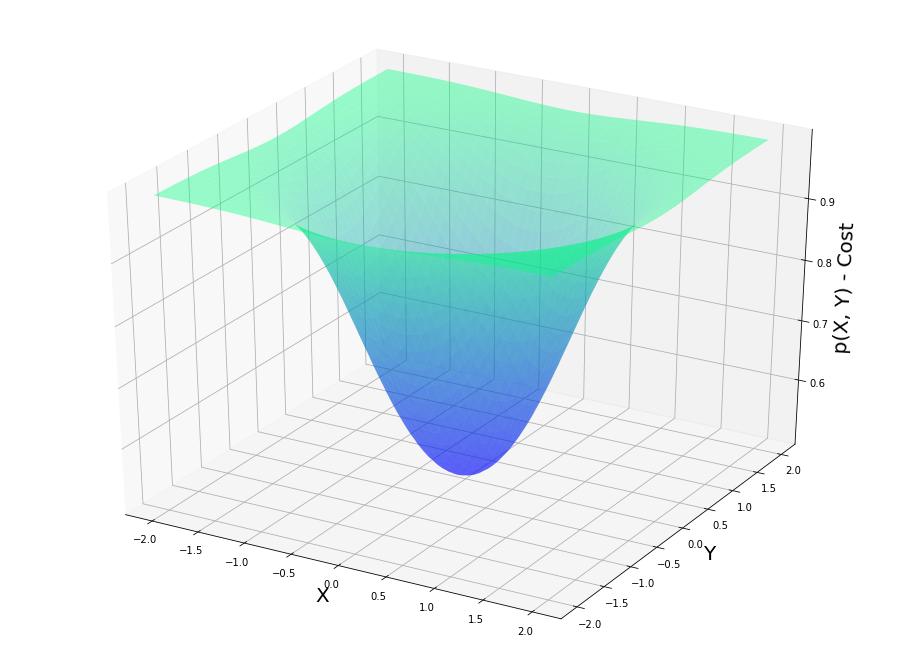

In [35]:
# Other color maps

# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')      # gca = Get Current Axis

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('p(X, Y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, p(x_4, y_4), cmap=cm.winter, alpha=0.4)    # x,y,z = 2D Arrays
plt.show()

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial p}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

## $$\frac{\partial p}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

In [36]:
a, b = symbols('x, y')    #From SymPy(Symbolic Mathematics)
print('Our cost function p(x, y) is', p(a, b))
print('Partial Derivative wrt x is', diff(p(a, b), a))        
# usage : diff(func_to_be_diffrentiated, the variable of differentiation)
# For evaluation of the value of the function at a particular point
print('Value of p(x, y) at x=1.8, y=1.0 is', p(a, b).evalf(subs={a:1.8, b:1.0})) 

Our cost function p(x, y) is 1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x is 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of p(x, y) at x=1.8, y=1.0 is 0.990604794032582


In [37]:
print('Value of slope of p(x, y) wrt x at x=1.8, y=1.0 is', 
      diff(p(a, b), a).evalf(subs={a:1.8, b:1.0}))

Value of slope of p(x, y) wrt x at x=1.8, y=1.0 is 0.0368089716197505


## Batch Gradient Descent with SymPy

In [38]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess

for n in range(max_iter):
    gradient_y = diff(p(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradient_x = diff(p(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients

# Results
print('Values n gradients array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', p(params[0], params[1]))

Values n gradients array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832e-11
Minimum occurs at y value of: 1.92132555492129e-11
The cost is: 0.500000000000000


In [39]:
# Partial Derivative Functions

def ppx(x, y):
    return 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

def ppy(x, y):
    return 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2

In [40]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess

for n in range(max_iter):
    gradient_y = ppy(params[0], params[1])
    gradient_x = ppx(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients

# Results
print('Values n gradients array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', p(params[0], params[1]))

Values n gradients array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Descent & Adv Numpy Arrays

In [41]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial Guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_y = ppy(params[0], params[1])
    gradient_x = ppx(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier*gradients
    values_array = np.append(arr=values_array, values=params.reshape(1, 2), axis = 0)
    # values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)

# Results
print('Values n gradients array', gradients)
print('Minimum occurs at x value of:', params[0])
print('Minimum occurs at y value of:', params[1])
print('The cost is:', p(params[0], params[1]))

(1, 2)
Values n gradients array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


In [42]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]:', hs_band[0])
print('hs_band[1][0]:', hs_band[1][0])

# Usage: np.append(arr=array_in_which_appending _is_done, values=array_to_be_appended, axis)
the_roots = np.append(arr=hs_band, values=kirk, axis=0)  
print(the_roots)

print('Printing nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]: ['Black Thought' 'MC']
hs_band[1][0]: Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']


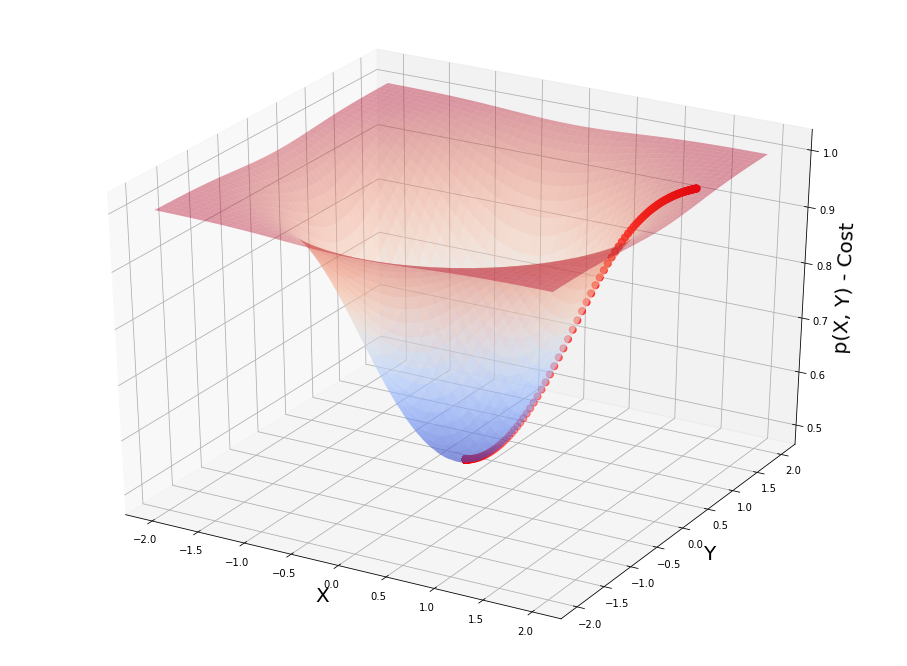

In [43]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')      # gca = Get Current Axis

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('p(X, Y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, p(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)     # x,y,z = 2D Arrays
ax.scatter(values_array[:, 0], 
           values_array[:, 1], p(values_array[:, 0], 
                                 values_array[:, 1]), s=50, color='red')
plt.show()

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big(y_{i} - h_\theta x_{i} \big)^2 $$

### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big(y_{i} - h_\theta x_{i} \big)^2 $$

$$Or$$

### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big(y - \hat{y} \big)^2 $$

In [44]:
# Make sample data
x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7,1)
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [45]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029554
Theta 1: 1.222726463783591


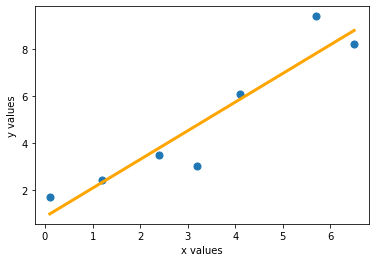

In [46]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [47]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029554 + 1.222726463783591*x_5
print('Est values y_hat are:\n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [48]:
def mse(x, y):
    s = (x - y)**2/len(x)   # or /x.size
    return s.sum()  # or return sum(s)
# Another approach
# s = np.average((y - y_hat)**2, axis=0)
# return s

In [49]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is:', mean_squared_error(y_5, y_hat))
print('MSE regression is:', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: 0.9479655759794574
MSE regression using manual calc is: 0.9479655759794575
MSE regression is: 0.9479655759794575


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [50]:
nr_thetas = 200  # No. of data points 
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE usong nested for loops

In [51]:
plot_cost = np.zeros((nr_thetas, nr_thetas))  # plot_cost has all elements initialized to 0

for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mean_squared_error(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t0.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [52]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'Value of i is {i} and j is {j}')   # fstring or string interpolation
             

Value of i is 0 and j is 0
Value of i is 0 and j is 1
Value of i is 0 and j is 2
Value of i is 1 and j is 0
Value of i is 1 and j is 1
Value of i is 1 and j is 2
Value of i is 2 and j is 0
Value of i is 2 and j is 1
Value of i is 2 and j is 2


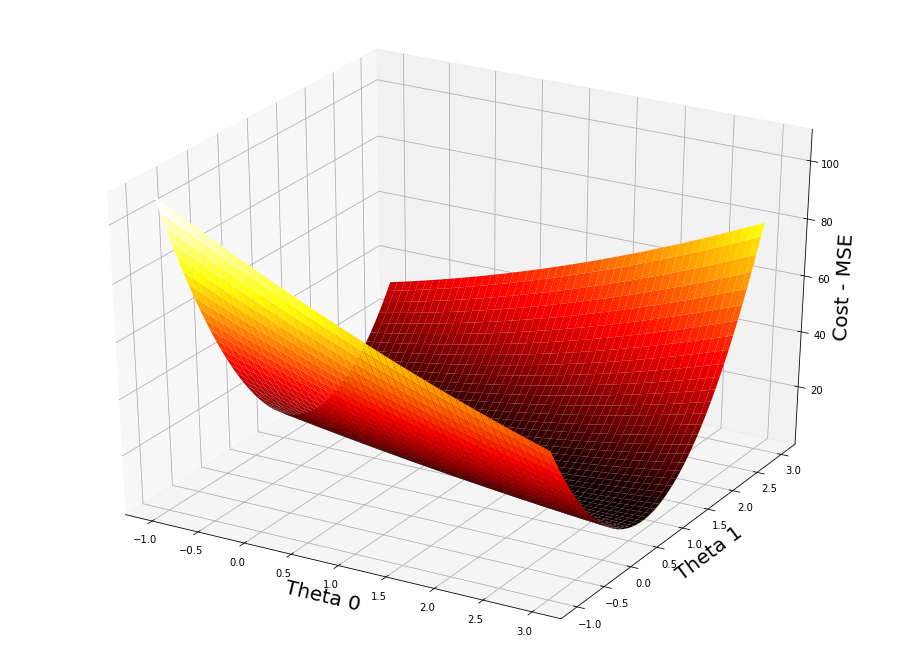

In [53]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [54]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)  # Returns the indices at which minimum occurs
print('Min occurs at (i, j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i, j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE w.r.t $\theta_{0}$ and $\theta_1$
## $$\frac{\partial{MSE}}{\partial{\theta_{0}}} = -\frac{2}{n}\sum_{i=1}^{n}\big(y^{(i)} - \theta_{0} - \theta_{1}x^{(i)}\big)$$

## $$\frac{\partial{MSE}}{\partial{\theta_{1}}} = -\frac{2}{n}\sum_{i=1}^{n}\big(y^{(i)} - \theta_{0} - \theta_{1}x^{(i)}\big)\big(x^{(i)}\big)$$

## MSE & Gradient Descent

In [55]:
# x values, y values, array of theta parameters (theta0 at index 0 theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = -2/n * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = -2/n * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope], theta1_slope[0])  # theta0_slope and theta1_slope are arrays with single element
    #return np.append(arr=theta0_slope, values=theta1_slope, axis=0)
    return np.concatenate((theta0_slope, theta1_slope), axis =0)    

In [56]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])    # initial guesses

# Collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: 0.9479751138321333


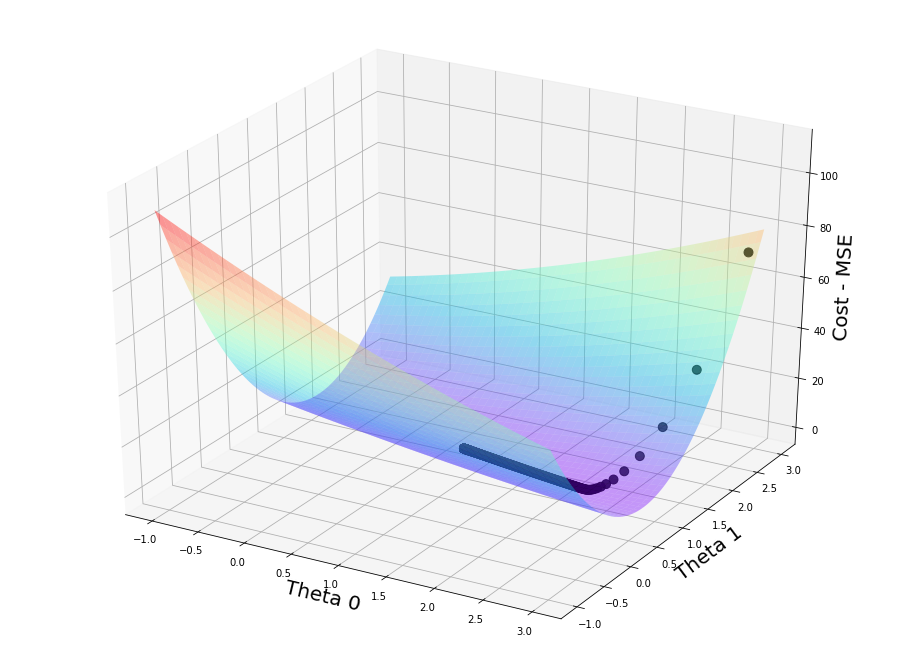

In [57]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()